## 1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from scipy import stats

In [2]:
df = pd.read_csv('../dataset/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Rename Column

In [4]:
df.rename(columns={'cp' : 'chest_pain', 'thalach' : 'max_heart_rate'}, inplace=True)
df.head()

,age,sex,chest_pain,trestbps,chol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Checking Missing Values

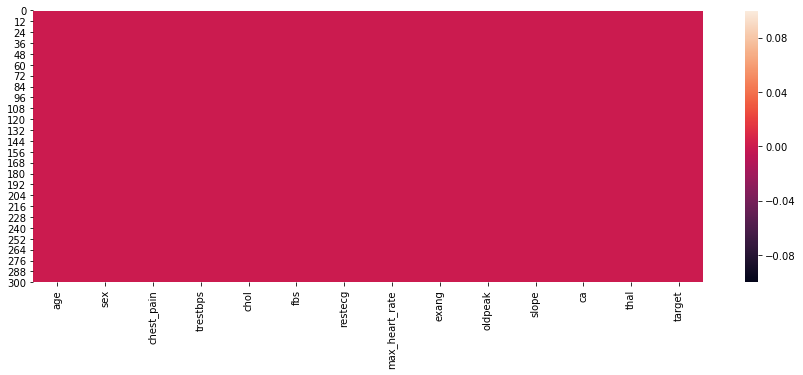

In [5]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull())
plt.show()

## EDA

In [6]:
df.describe()

,age,sex,chest_pain,trestbps,chol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


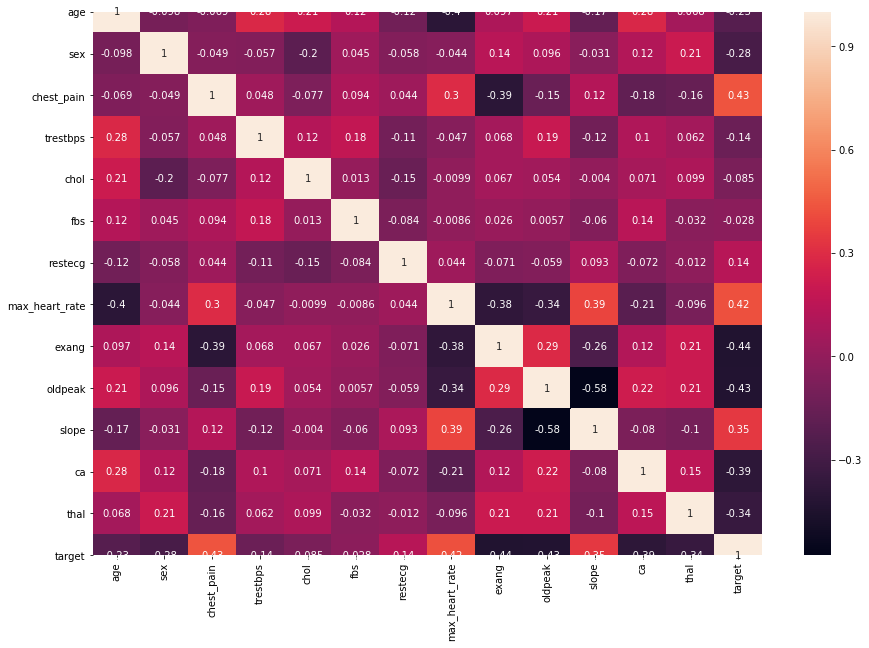

In [7]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## 2. SPLITTING DATASET (TRAIN & TEST)

In [8]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
X.head()

,age,sex,chest_pain,trestbps,chol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [11]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [12]:
import math
math.sqrt(len(y_test))

8.717797887081348

## 3.1 DEFINE CLASSIFIER (SVM)

In [13]:
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
y_pred_svm = classifier_svm.predict(X_test)

In [15]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[25  8]
 [ 3 40]]


In [16]:
f1_score(y_test, y_pred_svm)

0.8791208791208791

In [17]:
accuracy_score(y_test, y_pred_svm)

0.8552631578947368

## 3.2 DEFINE CLASSIFIER (KNN)

In [18]:
classifier_knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [19]:
y_pred_knn = classifier_knn.predict(X_test)

In [20]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[26  7]
 [ 3 40]]


In [21]:
f1_score(y_test, y_pred_knn)

0.888888888888889

In [22]:
accuracy_score(y_test, y_pred_knn)

0.868421052631579

## 3.3 DEFINE CLASSIFIER (Decision Trees)

In [23]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [24]:
y_pred_dt = classifier_dt.predict(X_test)

In [25]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[24  9]
 [ 6 37]]


In [26]:
f1_score(y_test, y_pred_dt)

0.8314606741573034

In [27]:
accuracy_score(y_test, y_pred_dt)

0.8026315789473685

## 3.4 DEFINE CLASSIFIER (Random Forest)

In [28]:
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
y_pred_rf = classifier_rf.predict(X_test)

In [30]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[25  8]
 [ 3 40]]


In [31]:
f1_score(y_test, y_pred_rf)

0.8791208791208791

In [32]:
accuracy_score(y_test, y_pred_rf)

0.8552631578947368

## COMBINING ACCURACY RESULTS:

In [33]:
print('SVM:' + str(round(accuracy_score(y_test, y_pred_svm)*100,2)) + '%')
print('KNN:' + str(round(accuracy_score(y_test, y_pred_knn)*100,2)) + '%')
print('Decision Trees:' + str(round(accuracy_score(y_test, y_pred_dt)*100,2)) + '%')
print('Random Forest:' + str(round(accuracy_score(y_test, y_pred_rf)*100,2)) + '%')

SVM:85.53%
KNN:86.84%
Decision Trees:80.26%
Random Forest:85.53%


## COMBINING F1 RESULTS:

In [34]:
print('SVM:' + str(round(f1_score(y_test, y_pred_svm)*100,2)) + '%')
print('KNN:' + str(round(f1_score(y_test, y_pred_knn)*100,2)) + '%')
print('Decision Trees:' + str(round(f1_score(y_test, y_pred_dt)*100,2)) + '%')
print('Random Forest:' + str(round(f1_score(y_test, y_pred_rf)*100,2)) + '%')

SVM:87.91%
KNN:88.89%
Decision Trees:83.15%
Random Forest:87.91%


## Predicting Result

In [35]:
# new_list = [[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]

# new_list = sc_X.transform(new_list)
# x_predict = classifier.predict(new_list)

# if x_predict == 0:
#     print('No Heart Disease')
# else:
#     print('Heart Disease')